<a href="https://colab.research.google.com/github/ratneshpuri/Music_Genre/blob/main/Music_Genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
data=pd.read_csv("train.csv")
data.sample(5)

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
3717,MSC_49360.0,Plain Gold Ring,29.199,0.920342,0.625316,285578.382,0.076815,0.000006,Scale A,0.217675,-19.658,Female,Minor,0.038134,60.073,Solo,0.407299,Jazz
115,MSC_32441.0,Andante spianato and Grande polonaise in E fla...,29.496,1.080829,0.197181,320496.131,0.010237,1.036402,Scale G,0.070662,-39.687,Both,Major,0.044875,70.524,Duet,0.075537,Classical
5493,MSC_31906.0,Dance Off (feat. Idris Elba & Anderson .Paak),62.043,0.045076,0.836483,-1.000,0.863864,0.000138,Scale G,0.176839,-4.221,Both,Major,0.057019,120.979,Duet,0.499929,Rap
6760,MSC_45187.0,"Madamina, Il Catalogo 1. Akt / Act 1",34.863,1.034953,0.317570,383405.959,0.225594,0.010131,Scale D,0.141343,-16.539,Male,Major,0.055647,79.11399999999999,Band,0.262161,Classical
3469,MSC_51908.0,Stop And Stare,66.765,0.063558,0.518298,-1.000,0.892852,0.000000,Scale E,0.086210,-4.619,Both,Major,0.037027,92.494,Duet,NaN,Rap


In [120]:
print(data.shape)
print(data.columns)

(15681, 18)
Index(['instance_id', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo',
       'musician_category', 'valence', 'music_genre'],
      dtype='object')


## Info

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15681 entries, 0 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        15681 non-null  object 
 1   track_name         15681 non-null  object 
 2   popularity         15039 non-null  float64
 3   acousticness       15681 non-null  float64
 4   danceability       15125 non-null  float64
 5   duration_ms        15587 non-null  float64
 6   energy             15587 non-null  float64
 7   instrumentalness   15586 non-null  float64
 8   key                15681 non-null  object 
 9   liveness           15681 non-null  float64
 10  loudness           15645 non-null  float64
 11  voice_gender       14916 non-null  object 
 12  mode               15646 non-null  object 
 13  speechiness        15655 non-null  float64
 14  tempo              15681 non-null  object 
 15  musician_category  14321 non-null  object 
 16  valence            150

In [122]:
print("Printing Null values")
print()
print(data.isnull().sum()/data.shape[0])

Printing Null values

instance_id          0.000000
track_name           0.000000
popularity           0.040941
acousticness         0.000000
danceability         0.035457
duration_ms          0.005995
energy               0.005995
instrumentalness     0.006058
key                  0.000000
liveness             0.000000
loudness             0.002296
voice_gender         0.048785
mode                 0.002232
speechiness          0.001658
tempo                0.000000
musician_category    0.086729
valence              0.043173
music_genre          0.000000
dtype: float64


## Popularity

In [123]:
data['popularity'].head()

0    49.178
1    59.827
2    89.023
3    55.762
4    45.095
Name: popularity, dtype: float64

In [124]:
data['popularity'].value_counts()

0.000     425
61.128      5
59.218      4
56.897      4
60.220      4
         ... 
10.826      1
65.644      1
74.370      1
91.889      1
25.263      1
Name: popularity, Length: 12743, dtype: int64

In [125]:
data['popularity'].isna().sum()

642

In [126]:
data['popularity']=data['popularity'].fillna(data['popularity'].median())

In [127]:
data['popularity'].isna().sum()

0

In [128]:
data['popularity'].isnull().any()

False

<Figure size 720x504 with 0 Axes>

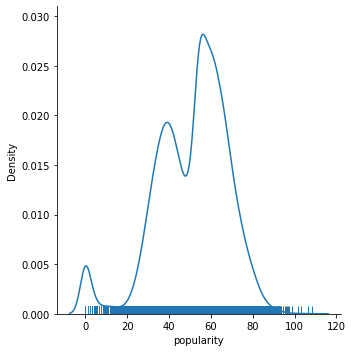

In [129]:
plt.figure(figsize=(10,7))
sns.displot(data['popularity'],kind='kde',rug=True)

In [130]:
print("The Skewness of salary is:",data['popularity'].skew())
print("The kurtosis of salary is:",data['popularity'].kurt())

The Skewness of salary is: -0.7160590856865925
The kurtosis of salary is: 0.7595529300172439


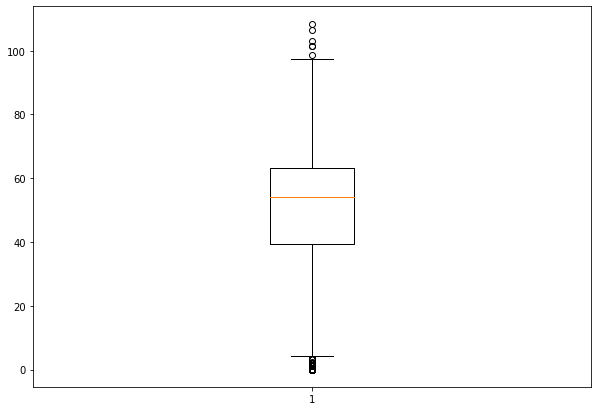

In [131]:
plt.figure(figsize =(10, 7))
plt.boxplot(data['popularity'])
plt.show()

In [132]:
def iqr(data):
    outlier=[]
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    print('Lower limit: ',lower)
    print("Upper limit: ",upper)
    for i in data:
        if i>upper or i< lower:
            outlier.append(i)
    return outlier

In [133]:
outliers_popularity=(iqr(data['popularity']))
print(len(outliers_popularity))

Lower limit:  3.9390000000000143
Upper limit:  98.53899999999999
496


## Dancebility

In [134]:
data['danceability'].head()

0    0.580508
1    0.687542
2    0.967948
3    0.616287
4    0.280645
Name: danceability, dtype: float64

In [135]:
data['danceability'].value_counts()

0.556014    1
0.634143    1
0.698457    1
0.759957    1
0.564296    1
           ..
0.341767    1
0.671082    1
0.616287    1
0.894473    1
0.707857    1
Name: danceability, Length: 15125, dtype: int64

In [136]:
data['danceability'].isna().sum()

556

In [137]:
data['danceability'].isnull().any()

True

In [138]:
data['danceability'].fillna(data['danceability'].median(),inplace=True)

In [139]:
data['danceability'].isna().sum()

0

[]

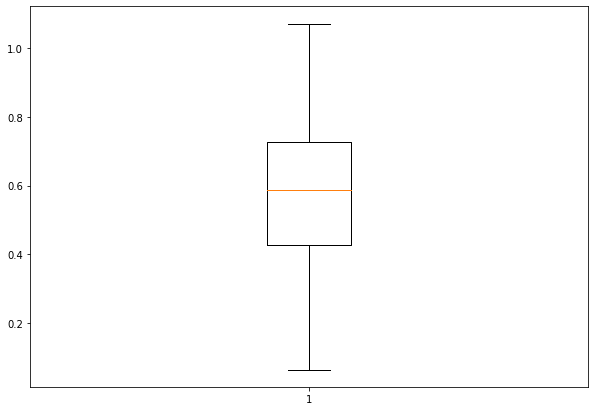

In [140]:
plt.figure(figsize=(10,7))
plt.boxplot(data['danceability'])
plt.plot()

## Duration_ms

In [141]:
data['duration_ms'].head()

0    214625.776
1    216232.195
2    273314.723
3    189189.605
4    410136.987
Name: duration_ms, dtype: float64

In [142]:
data['duration_ms'].value_counts()

-1.000         1577
 273597.170       1
 281382.692       1
 204858.363       1
 173165.779       1
               ... 
 112103.424       1
 259522.836       1
 214312.409       1
 384334.280       1
 155625.444       1
Name: duration_ms, Length: 14011, dtype: int64

In [143]:
data['duration_ms'].isna().sum()

94

In [144]:
data['duration_ms'].fillna(data['duration_ms'].median(),inplace=True)

In [145]:
data['duration_ms'].isnull().any()

False

In [146]:
data['duration_ms'].replace(to_replace=-1,value=data['duration_ms'].median(),inplace=True)

In [147]:
data['duration_ms'].value_counts()

236212.737    1672
252170.030       1
339851.020       1
173165.779       1
109325.721       1
              ... 
259522.836       1
214312.409       1
384334.280       1
230326.079       1
254353.499       1
Name: duration_ms, Length: 14010, dtype: int64

In [148]:
data['duration_ms'].isna().sum()

0

[]

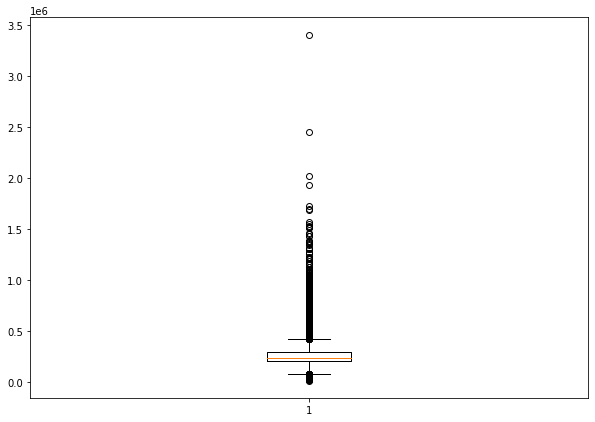

In [149]:
plt.figure(figsize=(10,7))
plt.boxplot(data['duration_ms'])
plt.plot()

In [150]:
outliers_dms=iqr(data['duration_ms'])
print(len(outliers_dms))

Lower limit:  78676.2765
Upper limit:  427985.84050000005
1364


## Energy

In [151]:
data['energy'].head()

0    0.192107
1    0.265942
2    0.857411
3    0.970513
4    0.114732
Name: energy, dtype: float64

In [152]:
data['energy'].value_counts()

-1.000000    1217
 0.819021       1
 0.689365       1
 0.667187       1
 0.638717       1
             ... 
 0.117919       1
 0.158754       1
 0.820201       1
 0.988438       1
 0.643425       1
Name: energy, Length: 14371, dtype: int64

In [153]:
data['energy'].isna().sum()

94

In [154]:

data['energy'].fillna(data['energy'].median(),inplace=True)

In [155]:
data['energy'].isnull().any()

False

In [156]:
data['energy'].replace(to_replace=-1,value=data['energy'].median(),inplace=True)

In [157]:
data['energy'].value_counts()

0.560389    1312
0.634185       1
0.948112       1
0.638717       1
1.018733       1
            ... 
0.820201       1
0.988438       1
0.247439       1
0.932241       1
0.985751       1
Name: energy, Length: 14370, dtype: int64

In [158]:
data['energy'].isna().sum()

0

[]

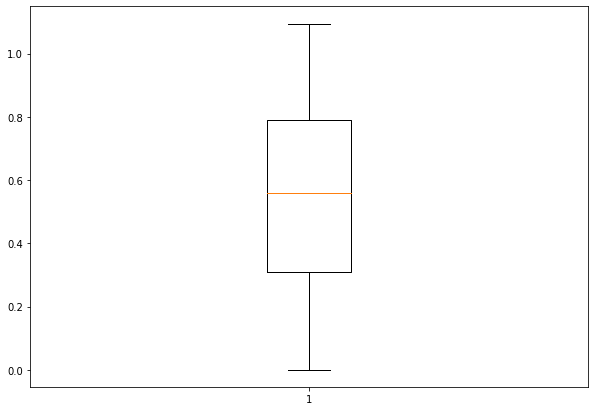

In [159]:
plt.figure(figsize=(10,7))
plt.boxplot(data['energy'])
plt.plot()

## Instrumentalness

In [160]:
data['instrumentalness'].head()

0    0.000000
1    0.000031
2    0.000000
3    0.000220
4    0.002753
Name: instrumentalness, dtype: float64

In [161]:
data['instrumentalness'].value_counts()

0.000000    4368
0.017232       1
1.005029       1
0.000302       1
0.001027       1
            ... 
0.003082       1
0.896949       1
0.000125       1
0.007162       1
1.035146       1
Name: instrumentalness, Length: 11219, dtype: int64

In [162]:
data['instrumentalness'].isna().sum()

95

In [163]:
data['instrumentalness'].fillna(data['instrumentalness'].median(),inplace=True)

In [164]:
data['instrumentalness'].isnull().any()

False

In [165]:
data['instrumentalness'].isna().sum()

0

[]

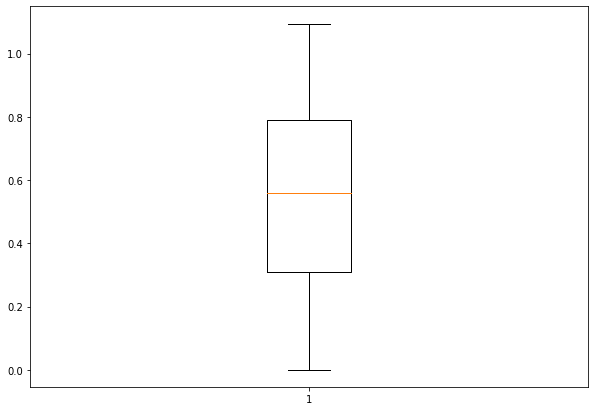

In [166]:
plt.figure(figsize=(10,7))
plt.boxplot(data['energy'])
plt.plot()

## Key

In [167]:
print("Printing all the unique value of key:-")
print(data.key.unique())
print()
print("Counting all the values of key:-")
print(data.key.value_counts())


Printing all the unique value of key:-
['Scale E' 'Scale A' 'Scale D' 'Scale F Sharp' 'Scale G Sharp'
 'Scale C Sharp' 'Scale A Sharp' 'Scale F' 'Scale G' 'Scale B' 'Scale C'
 'Scale D Sharp']

Counting all the values of key:-
Scale C          1771
Scale G          1730
Scale D          1695
Scale C Sharp    1633
Scale A          1479
Scale F          1419
Scale E          1210
Scale A Sharp    1142
Scale B          1059
Scale G Sharp    1023
Scale F Sharp     916
Scale D Sharp     604
Name: key, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

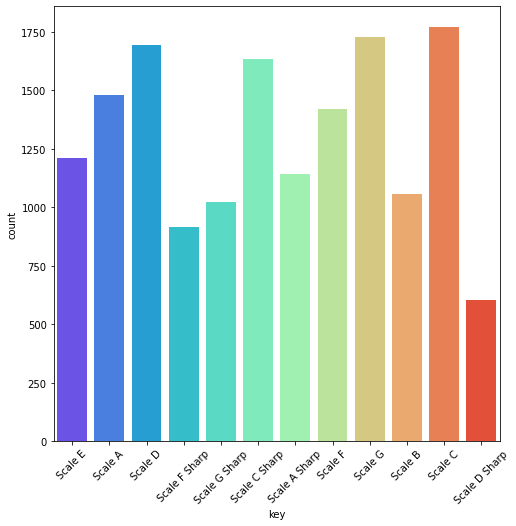

In [168]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['key'],palette='rainbow')
plt.xticks(rotation=45)

## Voice_Gender

In [169]:
print("Printing all the unique values of gender:-")
print(data.voice_gender.unique())
print()
print("Counting all the unique values:-")
print(data.voice_gender.value_counts())

Printing all the unique values of gender:-
[nan 'Male' 'Female' 'Both']

Counting all the unique values:-
Female    5050
Male      4953
Both      4913
Name: voice_gender, dtype: int64


In [170]:
data['voice_gender'].isna().sum()

765

In [171]:
data['voice_gender'].fillna(data['voice_gender'].mode()[0],inplace=True)
print("Printing all the unique values of gender:-")
print(data.voice_gender.unique())

Printing all the unique values of gender:-
['Female' 'Male' 'Both']


In [172]:
print(data.voice_gender.value_counts())
print(data['voice_gender'].isna().sum())

Female    5815
Male      4953
Both      4913
Name: voice_gender, dtype: int64
0


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

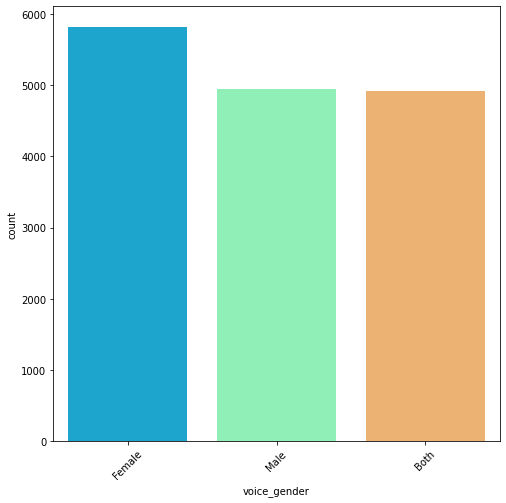

In [173]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['voice_gender'],palette='rainbow')
plt.xticks(rotation=45)

## Mode

In [174]:
print("Printing all the unique values of mode:-")
print(data['mode'].unique())
print()
print("Counting all the unique values of mode:-")
print(data['mode'].value_counts())

Printing all the unique values of mode:-
['Major' '?' 'Minor' nan]

Counting all the unique values of mode:-
Major    9210
Minor    5357
?        1079
Name: mode, dtype: int64


In [175]:
data['mode'].isna().sum()

35

In [176]:
data['mode'].replace(to_replace='?',value=np.nan,inplace=True)

In [177]:
data['mode'].isna().sum()

1114

In [178]:
data['mode'].fillna(data['mode'].mode()[0],inplace=True)

In [179]:
print("Printing all the unique values of mode:-")
print(data['mode'].unique())
print()
print("Counting all the unique values of mode:-")
print(data['mode'].value_counts())

Printing all the unique values of mode:-
['Major' 'Minor']

Counting all the unique values of mode:-
Major    10324
Minor     5357
Name: mode, dtype: int64


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

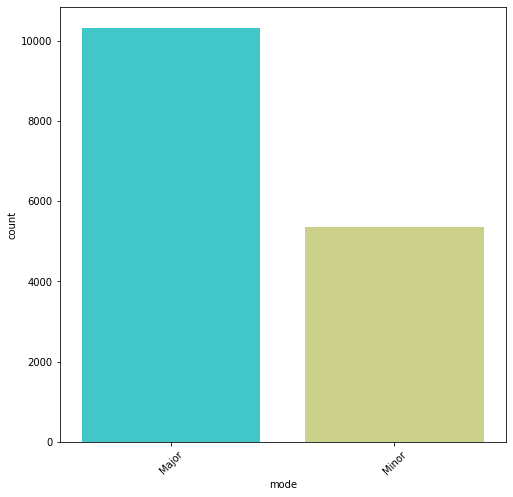

In [180]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['mode'],palette='rainbow')
plt.xticks(rotation=45)

## Speechiness 

In [181]:
data['speechiness'].head()

0    0.046404
1    0.039949
2    0.119917
3    0.167493
4    0.039139
Name: speechiness, dtype: float64

In [182]:
data['speechiness'].value_counts()

0.117364    1
0.365236    1
0.036513    1
0.039474    1
0.126350    1
           ..
0.053269    1
0.040512    1
0.379777    1
0.030869    1
0.039236    1
Name: speechiness, Length: 15655, dtype: int64

In [183]:
data['speechiness'].isna().sum()

26

In [184]:
data['speechiness'].fillna(data['speechiness'].median(),inplace=True)

In [185]:
data['speechiness'].isna().sum()

0

[]

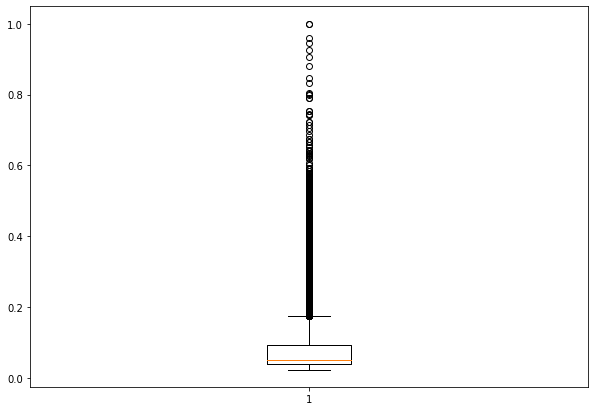

In [186]:
plt.figure(figsize=(10,7))
plt.boxplot(data['speechiness'])
plt.plot()

## Tempo

In [187]:
data['tempo'].head()

0    143.78799999999998
1                     ?
2    105.01799999999999
3                     ?
4    112.18299999999999
Name: tempo, dtype: object

In [188]:
data['tempo'].value_counts()

?                     1476
100.014                  6
100.01                   6
100.00299999999999       6
100.012                  5
                      ... 
144.928                  1
145.07399999999998       1
137.98                   1
129.594                  1
102.29899999999999       1
Name: tempo, Length: 12332, dtype: int64

In [189]:
data['tempo'].replace(to_replace='?',value=np.nan,inplace=True)

In [190]:
print("Printing all the unique values of tempo:-")
print(data['tempo'].unique())
print()
print("Counting all the unique values of tempo:-")
print(data['tempo'].value_counts())

Printing all the unique values of tempo:-
['143.78799999999998' nan '105.01799999999999' ... '129.445' '123.17'
 '94.2']

Counting all the unique values of tempo:-
100.01                6
100.014               6
100.00299999999999    6
120.012               5
100.01100000000001    5
                     ..
134.984               1
123.993               1
89.936                1
129.874               1
131.918               1
Name: tempo, Length: 12331, dtype: int64


In [191]:
data['tempo'].isna().sum()

1476

In [192]:
data['tempo']=data['tempo'].astype(float)

In [193]:
data['tempo'].fillna(data['tempo'].median(),inplace=True)

In [194]:
data['tempo'].isna().sum()

0

## Musician_category

In [195]:
data['musician_category'].head()

0    Band
1    Band
2    Band
3    Duet
4    Band
Name: musician_category, dtype: object

In [196]:
data['musician_category'].unique()

array(['Band', 'Duet', 'Solo', nan], dtype=object)

In [197]:
data['musician_category'].value_counts()

Band    4843
Solo    4784
Duet    4694
Name: musician_category, dtype: int64

In [198]:
data['musician_category'].isna().sum()

1360

In [199]:
data['musician_category'].fillna(data['musician_category'].mode()[0],inplace=True)

In [200]:
data['musician_category'].isna().sum()

0

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

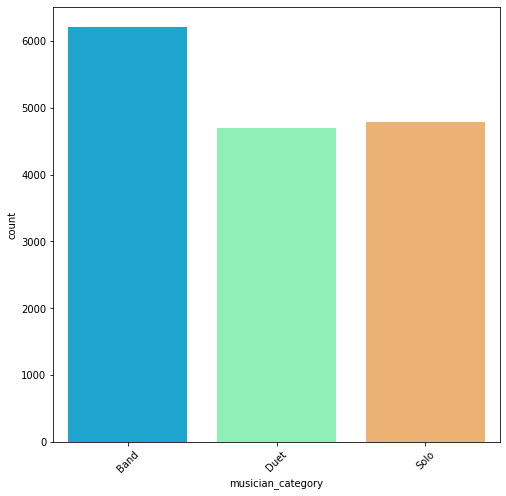

In [201]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['musician_category'],palette='rainbow')
plt.xticks(rotation=45)

## Valence

In [202]:
data['valence'].head()

0    0.598965
1    0.357194
2    0.635525
3    0.983750
4    0.074412
Name: valence, dtype: float64

In [203]:
data['valence'].value_counts()

0.576256    1
0.626088    1
0.677872    1
0.518300    1
0.664878    1
           ..
0.285268    1
0.731194    1
0.561186    1
0.436409    1
0.000000    1
Name: valence, Length: 15004, dtype: int64

In [204]:
data['valence'].isna().sum()

677

In [205]:
data['valence'].fillna(data['valence'].median(),inplace=True)

In [206]:
data['valence'].isna().sum()

0

## Music_Genre

In [207]:
data['music_genre'].head()

0         Jazz
1         Jazz
2          Rap
3         Rock
4    Classical
Name: music_genre, dtype: object

In [208]:
data['music_genre'].unique()

array(['Jazz', 'Rap', 'Rock', 'Classical', 'Electronic', 'Country',
       'Hip-Hop'], dtype=object)

In [209]:
data['music_genre'].isna().sum()

0

In [210]:
data['music_genre'].value_counts()

Classical     3990
Rock          3879
Rap           3207
Jazz          2850
Country        683
Electronic     614
Hip-Hop        458
Name: music_genre, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

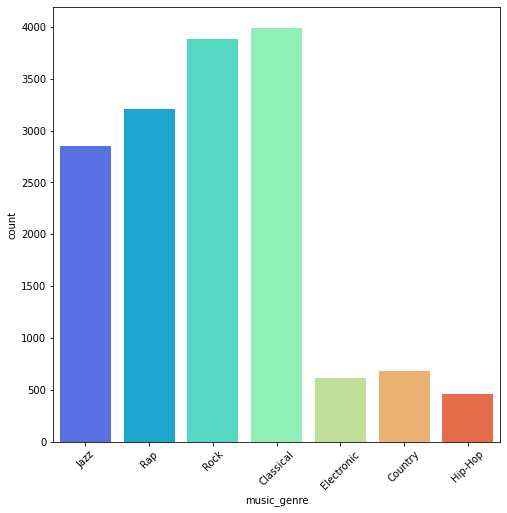

In [211]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['music_genre'],palette='rainbow')
plt.xticks(rotation=45)

## Model Building

In [212]:
X=data.drop(['instance_id','track_name','music_genre'],axis=1)

In [213]:
X.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,Female,Major,0.046404,143.788,Band,0.598965
1,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,Major,0.039949,113.108,Band,0.357194
2,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018,Band,0.635525
3,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,113.108,Duet,0.983750
4,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183,Band,0.074412


In [214]:
X.shape

(15681, 15)

In [215]:
X_new=pd.get_dummies(X,drop_first=True)
print(X_new.shape)

(15681, 27)


In [216]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X_new)


In [217]:
X_scaled.shape

(15681, 27)

In [218]:
Y=data[['music_genre']]
Y.head()

,music_genre
0,Jazz
1,Jazz
2,Rap
3,Rock
4,Classical


In [219]:
Y['music_genre'].unique()

array(['Jazz', 'Rap', 'Rock', 'Classical', 'Electronic', 'Country',
       'Hip-Hop'], dtype=object)

In [220]:
Y['music_genre'].value_counts()

Classical     3990
Rock          3879
Rap           3207
Jazz          2850
Country        683
Electronic     614
Hip-Hop        458
Name: music_genre, dtype: int64

In [221]:
Y_new=Y['music_genre'].replace(to_replace=['Jazz', 'Rap', 'Rock', 'Classical', 'Electronic', 'Country',
       'Hip-Hop'],value=[0,1,2,3,4,5,6])

In [222]:
Y_new.head()

0    0
1    0
2    1
3    2
4    3
Name: music_genre, dtype: int64

In [223]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y_new,test_size=0.2)

In [224]:
x_train[:5]

array([[ 2.62790698e-01, -3.01453766e-01,  3.60303374e-01,
        -2.07424804e-01,  5.97004871e-01, -1.13698598e-03,
        -7.05263927e-02,  4.15057718e-01, -1.95430061e-01,
        -4.81550700e-01,  1.29579461e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-4.40422833e-01, -1.93666359e-01,  5.70044383e-01,
         1.61819751e+00,  5.68169001e-01, -1.12850830e-03,
        -1.41428255e-01, -2.55797324e-01,  1.60003464e-01,
        -1.98150278e-01,  6.12920035e-01,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+

In [225]:
print(x_train.shape)
print(y_train.shape)

(12544, 27)
(12544,)


In [226]:
import tensorflow as tf
from tensorflow import keras

In [227]:
model=keras.Sequential([
                        keras.layers.Dense(5,activation='relu',input_shape=(X_new.shape[1],)),
                        keras.layers.Dense(10,activation='relu'),
                        keras.layers.Dense(5,activation='relu'),
                        keras.layers.Dense(5,activation='relu'),
                        keras.layers.Dense(5,activation='relu'),
                        keras.layers.Dense(7,activation='relu'),
                        keras.layers.Dense(1,activation='softmax')
])

In [229]:
model.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.5),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=10)

Epoch 1/10
392/392 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.1851
Epoch 2/10
392/392 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1852
Epoch 3/10
392/392 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1852
Epoch 4/10
392/392 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1852
Epoch 5/10
392/392 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1852
Epoch 6/10
392/392 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1852
Epoch 7/10
392/392 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1852
Epoch 8/10
392/392 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1852
Epoch 9/10
392/392 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1852
Epoch 10/10
392/392 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1852
